In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from tqdm import tqdm

from odelibrary import MagneticPendulum, my_solve_ivp
from pdb import set_trace as bp

In [2]:
ode = MagneticPendulum()

print('Checking approximate fixed points...')
# check 3 approx fixed points:
fp = np.array([0, -np.sqrt(3)/9, 0, 1/3])
print('f(u={}) = {}'.format(fp, ode.rhs(fp, t=0)))

fp = np.array([0, -np.sqrt(3)/9, 0, -1/3])
print('f(u={}) = {}'.format(fp, ode.rhs(fp, t=0)))

fp = np.array([0, 2*np.sqrt(3)/9, 0, 0])
print('f(u={}) = {}'.format(fp, ode.rhs(fp, t=0)))


# solve the ode for long time w/ different ICs to try to establish bounds for the attractor
T = 100
dt = 0.01
ic = ode.get_ic(1.5) # choose the size of initial box to draw random IC from.
# ic[0] = ode.loc[2,0] + np.random.randn()
# ic[2] = ode.loc[2,1] + np.random.randn()
# ic = np.array([0.288,  0, 0.5, 0])
t_eval = np.arange(start=0, stop=T+dt, step=dt)
t_span = [t_eval[0], t_eval[-1]]
settings = {'method': 'DOP853', 'rtol':1e-10, 'atol':1e-10}

print('\nSolving the model with IC = ', ic)
u_long = my_solve_ivp(ic, ode.rhs, t_eval, t_span, settings)

print('Final state:', u_long[-1])
print('max(u) = ', np.max(u_long))
print('min(u) = ', np.min(u_long))

Checking approximate fixed points...
f(u=[ 0.         -0.19245009  0.          0.33333333]) = [-0.00163518  0.          0.00283222  0.        ]
f(u=[ 0.         -0.19245009  0.         -0.33333333]) = [-0.00163518  0.         -0.00283222  0.        ]
f(u=[0.         0.38490018 0.         0.        ]) = [0.00327036 0.         0.         0.        ]

Solving the model with IC =  [-0.92381034 -0.7118467   1.21880972  0.46007802]
Final state: [-5.85651403e-05 -1.92869307e-01  7.01671463e-06  3.34078795e-01]
max(u) =  1.3632254853103372
min(u) =  -1.5990811735786


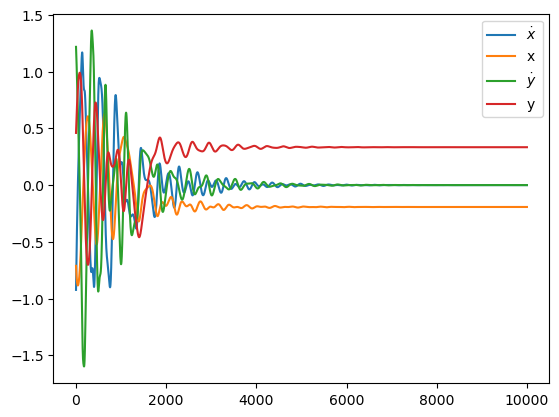

In [3]:
plt.plot(u_long)
plt.legend([r'$\dot{x}$','x',r'$\dot{y}$','y'])

In [4]:
ode = MagneticPendulum()
training_box_size = 1
testing_box_size = 0.5
n_per_axis = 50 # number of mesh points on each axis (n_per_axis^4 is total number of grid points)
u = ode.make_grid(box_size=training_box_size, n_per_axis=n_per_axis)
udot = ode.rhs(u, t=0)

In [ ]:
# Fit RHS with random features
n_features = 3000
ode.train_random_features(n_features=n_features, u_input=u, u_output=udot, alpha=1e-9)

# print('Handmade MSE = ', np.mean( (ode.rhs_approx(u) - udot)**2))

In [ ]:
# Test trajectory predictions for a new ICs

for i in range(5):
    ic = ode.get_ic(testing_box_size) # choose the size of initial box to draw random IC from.
    u_true = my_solve_ivp(ic, ode.rhs, t_eval, t_span, settings)
    print('Max u_true = ', np.max(u_true))
    print('Min u_true = ', np.min(u_true))
    u_approx = my_solve_ivp(ic, ode.rhs_approx, t_eval, t_span, settings)
    plt.figure()
    plt.plot(u_true[:,1], '-b',  label='x true')
    plt.plot(u_approx[:,1], ':b',  label='x approx')

    plt.plot(u_true[:,3], '-r',  label='y true')
    plt.plot(u_approx[:,3], ':r',  label='y approx')
